In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
en_scores = [42, 69, 56, 41, 57, 48, 65, 49, 65, 58]
ma_scores = [65, 80, 63, 63, 76, 60, 81, 66, 82, 78]

In [3]:
scores_df = pd.DataFrame(
    {
        'english': en_scores,
        'mathematics': ma_scores
    },
    index=pd.Index(
        [
            'A', 'B', 'C', 'D', 'E',
            'F', 'G', 'H', 'I', 'J'
        ],
        name = 'student'
    )

)

In [4]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,82


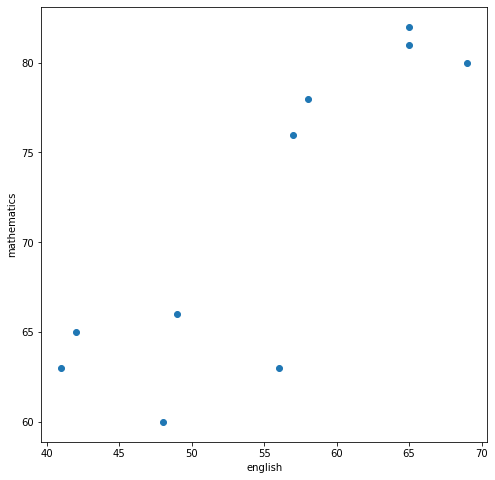

In [5]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1,1,1)
# 산점도
ax.scatter(scores_df['english'], scores_df['mathematics'])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

In [6]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = \
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = \
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviation'] = \
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,82,10.0,10.6,106.0


In [7]:
summary_df['product of deviation'].mean() ## 공분산

65.6

In [8]:
print(f"english분산 : {np.square(summary_df['english_deviation']).mean()}") ## 분산 (편차 제곱의 평균)
print(f"mathematics분산 : {np.square(summary_df['mathematics_deviation']).mean()}")

english분산 : 86.0
mathematics분산 : 68.44000000000001


In [9]:
np.cov(summary_df['english'], summary_df['mathematics'], ddof=0)

array([[86.  , 65.6 ],
       [65.6 , 68.44]])

In [10]:
print(f"english분산: {np.var(summary_df['english'], ddof=0)}")
print(f"english분산: {np.var(summary_df['mathematics'], ddof=0)}")

english분산: 86.0
english분산: 68.44000000000001


In [11]:
## 상관계수
# 영어와 수학의 Covariance / (영어의 표준편차 * 수학의 표준편차)

np.cov(summary_df['english'], summary_df['mathematics'], ddof=0)[0,1] /\
    (np.std(summary_df['english'] * np.std(summary_df['mathematics'])))

0.855065951563453

In [12]:
## 상관계수 (넘파이 함수로 구하기)

np.corrcoef(summary_df['english'], summary_df['mathematics'])

array([[1.        , 0.85506595],
       [0.85506595, 1.        ]])

In [13]:
scores_df.corr()

,english,mathematics
english,1.000000,0.855066
mathematics,0.855066,1.000000


In [14]:
## 계수 beta_0와 beta_1을 구한다.

poly_fit = np.polyfit(scores_df['english'], scores_df['mathematics'], 1)
poly_fit

array([ 0.7627907 , 29.44651163])

In [15]:
## beta_1 * x + beta_0를 반환하는 함수 작성.

poly_1d = np.poly1d(poly_fit)
poly_1d

poly1d([ 0.7627907 , 29.44651163])

In [16]:
## 직선을 그리기 위해 x좌표, y좌표 생성.
xs = np.linspace(scores_df['english'].min(), scores_df['english'].max())
ys = poly_1d(xs)
# ys

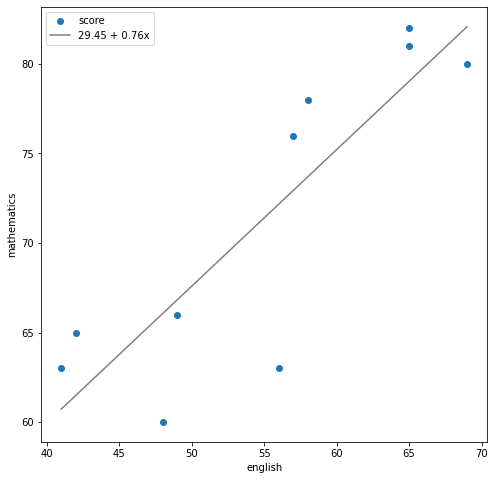

In [17]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
ax.scatter(scores_df['english'], scores_df['mathematics'], label='score')

ax.plot(
    xs, ys, color='gray',
    label = f"{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x"
)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.legend()


plt.show()

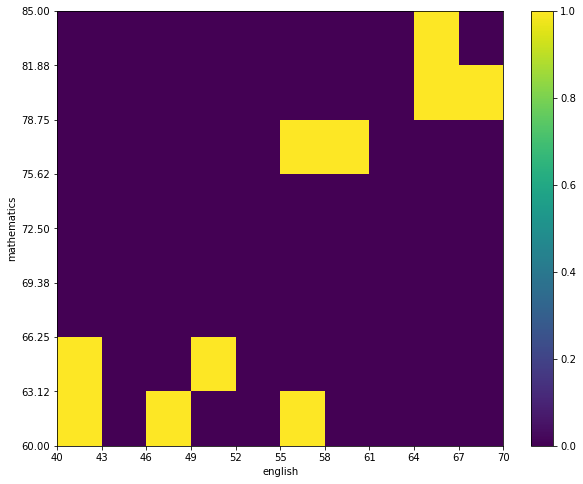

In [18]:
f, ax = plt.subplots(1,1, figsize=(10, 8))


c = ax.hist2d(
    scores_df['english'], scores_df['mathematics'],
    bins=[10,8], range=[(40,70), (60,85)]
)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

In [19]:
import json
from pprint import pprint

In [20]:
with open('./anscombe.json') as filename:
    anscombe = json.load(filename)
pprint(anscombe[:5])

[{'Series': 'I', 'X': 10.0, 'Y': 8.04},
 {'Series': 'I', 'X': 8.0, 'Y': 6.95},
 {'Series': 'I', 'X': 13.0, 'Y': 7.58},
 {'Series': 'I', 'X': 9.0, 'Y': 8.81},
 {'Series': 'I', 'X': 11.0, 'Y': 8.33}]


In [25]:
df_anscombe = pd.DataFrame.from_records(anscombe, index='Series')
df_anscombe.head()

,X,Y
Series,,
I,10.0,8.04
I,8.0,6.95
I,13.0,7.58
I,9.0,8.81
I,11.0,8.33


In [26]:
df_anscombe.shape

(44, 2)

In [27]:
df_anscombe.index.unique()

Index(['I', 'II', 'III', 'IV'], dtype='object', name='Series')

In [30]:
df_anscombe[df_anscombe.index == 'I']

,X,Y
Series,,
I,10.0,8.04
I,8.0,6.95
I,13.0,7.58
I,9.0,8.81
I,11.0,8.33
I,14.0,9.96
I,6.0,7.24
I,4.0,4.26
I,12.0,10.84


In [31]:
stats_df = pd.DataFrame(
    index = [
        'X_mean', 'X_variance', 'Y_mean', 'Y_variance',
        'X&Y_correlation', 'X&Y_regression line'
    ]
)

In [37]:
df_anscombe[df_anscombe.index=='I']['X']

Series
I    10.0
I     8.0
I    13.0
I     9.0
I    11.0
I    14.0
I     6.0
I     4.0
I    12.0
I     7.0
I     5.0
Name: X, dtype: float64

In [35]:
## 4개 Series 별로 통계지표 계산하기

for series in list(df_anscombe.index.unique()):
    dataX = df_anscombe[df_anscombe.index == series]['X']
    dataY = df_anscombe[df_anscombe.index == series]['Y']
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f"data{series}"] = \
        [
            f"{np.mean(dataX):.2f}",
            f"{np.var(dataX):.2f}",
            f"{np.mean(dataY):.2f}",
            f"{np.var(dataY):.2f}",
            f"{np.corrcoef(dataX, dataY)[0,1]:.2f}",
            f"{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x"
        ]
stats_df

,dataI,dataII,dataIII,dataIV
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.76,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


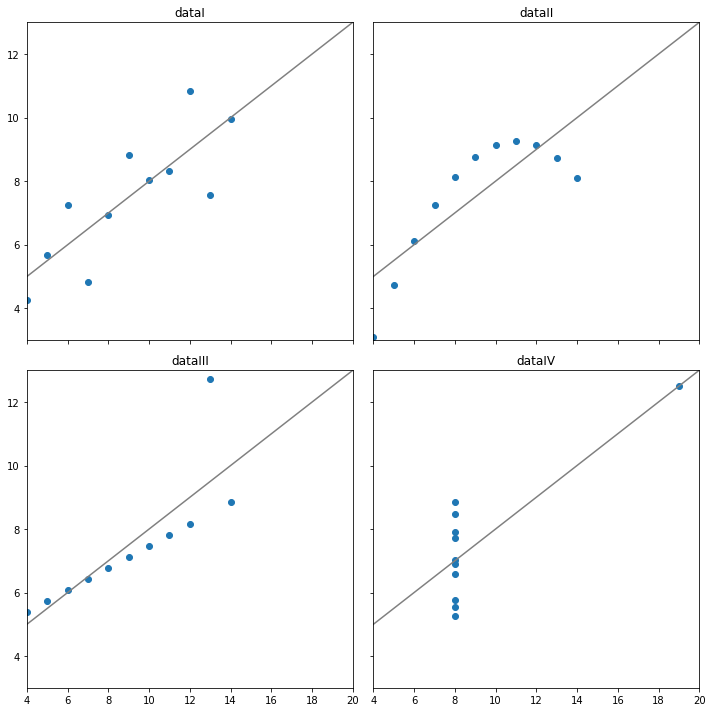

In [46]:
## 4개 그래프를 그리기위한 2X2 영역 생성

f, axes = plt.subplots(
    2, 2, figsize=(10, 10),
    sharex=True, sharey=True    
)

xs = np.linspace(0, 30, 100)
for i, series in enumerate(list(df_anscombe.index.unique())):
    dataX = df_anscombe[df_anscombe.index==series]['X']
    dataY = df_anscombe[df_anscombe.index==series]['Y']
    poly_fit = np.polyfit(dataX, dataY, 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    # 그리는 영역 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    
    ax.set_title(f'data{series}')
    ax.scatter(dataX, dataY)
    ax.plot(xs, ys, color='gray')

plt.tight_layout()
plt.show()